Gradient Descent Optimization

Name : Shadeeb Hossain

Tutorial blog : https://shtech-techfortheyouth.wordpress.com/2024/06/18/gradient-descent-optimization/

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model,preprocessing

Loading the data

In [ ]:
names=['id','thick', 'size_unif','marg','cell_size','bare','chrom','normal','mit','class']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=names,na_values='?',header=None)
df=df.dropna()
df.head(10)

,id,thick,size_unif,marg,cell_size,bare,chrom,normal,mit,class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
1017122,8,10,10,8,7,10.0,9,7,1,4
1018099,1,1,1,1,2,10.0,3,1,1,2
1018561,2,1,2,1,2,1.0,3,1,1,2
1033078,2,1,1,1,2,1.0,1,1,5,2
1033078,4,2,1,1,2,1.0,2,1,1,2


Create a matrix of all the 9 features.

Y is a binary indicator if sample is (i) benign (class) or (ii) malignant (class).

In [ ]:
# Getting the nine variables (predictors)
Xnames=names[1:-1] # You want to exclude 1st and last column
X=np.array(df[Xnames])

# Converting the response Y to a 0-1 indicator
yraw=np.array(df['class'])
BEN_VAL=2 # The value for benign in class
MAL_VAL=4 #The value for malignant in class
y=(yraw==MAL_VAL).astype(int)

Training and Testing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xtr,Xts,ytr,yts=train_test_split(X,y,test_size=0.30)
# Scale the data

scal=StandardScaler()
Xtr1=scal.fit_transform(Xtr)
Xts1=scal.transform(Xts)

Fitting the model and measuring its accuracy

In [ ]:
from sklearn import linear_model
reg=linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1,ytr)

# Measuring the test error
yhat=reg.predict(Xts1)
acc=np.mean(yhat==yts)
print("Accuracy on test dat= %f" %acc)

Accuracy on test dat= 0.946341


Computing Loss and Gradient

In [ ]:
import numpy as np

class LogisticFun:
    def __init__(self, X, y):
        """
        Initialize the logistic function class with input features X and target values y.

        Parameters:
        X (numpy.ndarray): The input feature matrix (n_samples x n_features).
        y (numpy.ndarray): The target values (n_samples,).
        """
        self.X = X
        self.y = y
        n = X.shape[0]  # Number of samples
        # Add a column of ones to X for the intercept term
        self.A = np.column_stack((np.ones(n), X))

    def feval(self, w):
        """
        Evaluate the binary cross entropy loss and its gradient for a given weight vector w.

        Parameters:
        w (numpy.ndarray): The weight vector (n_features + 1,).

        Returns:
        f (float): The binary cross entropy loss.
        fgrad (numpy.ndarray): The gradient of the loss with respect to the weight vector.
        """
        # Linear combination
        z = self.A.dot(w)

        # Sigmoid function
        py = 1 / (1 + np.exp(-z))

        # Binary cross entropy loss
        f = -np.sum(self.y * np.log(py) + (1 - self.y) * np.log(1 - py))

        # Gradient of the loss
        df_dz = py - self.y
        fgrad = self.A.T.dot(df_dz)

        return f, fgrad

# Example usage
log_fun = LogisticFun(Xtr1, ytr)

# Some random point
p = Xtr1.shape[1] + 1
w0 = np.random.randn(p)

# Call the function
f, fgrad = log_fun.feval(w0)

print("Loss:", f)
print("Gradient:", fgrad)


Loss: 583.7700378905324
Gradient: [  28.66254655 -269.12106553 -267.54501881 -236.10211465 -230.48569105
 -243.05907546 -242.00262817 -230.78170746 -148.65173582]


It is now important to compare the gradient

In [ ]:
# A random initial point
p=X.shape [1]+1
w0=np.random.randn(p)

# Perturb the point

step=1e-6
w1=w0+step*np.random.randn(p)

# Measure the function and gradient at w0 and w1
f0,fgrad0=log_fun.feval(w0)
f1,fgrad1=log_fun.feval(w1)

# Predict the amount that the function should change based on their gardient
df_est=fgrad0.dot(w1-w0)

# Print the actual and predicted values to see if they are close
print("Actual f1-f0= %12.4e" %(f1-f0))
print("Predicted f1-f0= %12.4e" % df_est)



Actual f1-f0=  -9.2993e-04
Predicted f1-f0=  -9.2994e-04


A simple Gradient Descent Optimizer

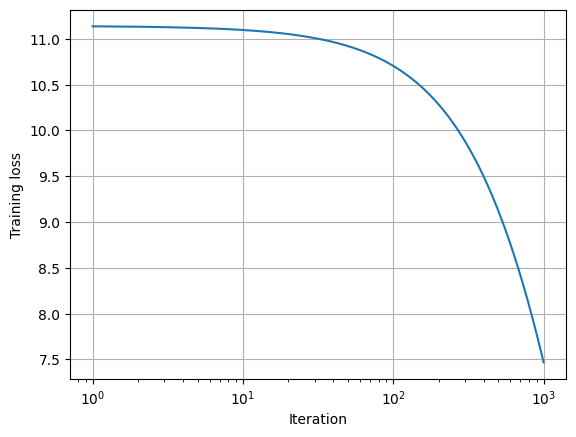

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def grad_opt_sim(feval, winit, lr=1e-3, nit=1000):
    """
    Simple Gradient Descent Optimizer
    feval is the function that returns f, fgrad
    winit: Initial Estimate
    lr=learning rate
    nit=number of iterations
    """
    w0 = winit

    # For tracking progress in each iteration
    hist = {'w': [], 'f': []}

    # Loop over iterations
    for it in range(nit):
        # Evaluate the function and gradient
        f0, fgrad0 = feval(w0)
        # Take a gradient step
        w0 = w0 - lr * fgrad0

        # Save history
        hist['f'].append(f0)
        hist['w'].append(w0)

    # Convert to numpy arrays
    for elem in ('f', 'w'):
        hist[elem] = np.array(hist[elem])

    return w0, f0, hist

# Assume p is defined somewhere
p = 10  # Example value for p
winit = np.random.randn(p)
def feval(self, w):
        """
        Evaluate the binary cross entropy loss and its gradient for a given weight vector w.

        Parameters:
        w (numpy.ndarray): The weight vector (n_features + 1,).

        Returns:
        f (float): The binary cross entropy loss.
        fgrad (numpy.ndarray): The gradient of the loss with respect to the weight vector.
        """
        # Linear combination
        z = self.A.dot(w)

        # Sigmoid function
        py = 1 / (1 + np.exp(-z))

        # Binary cross entropy loss
        f = -np.sum(self.y * np.log(py) + (1 - self.y) * np.log(1 - py))

        # Gradient of the loss
        df_dz = py - self.y
        fgrad = self.A.T.dot(df_dz)

        return f, fgrad

feval = log_fun.feval
nit = 1000
lr = 1e-4

# Run the gradient descent
w, f0, hist = grad_opt_sim(feval, winit, lr=lr, nit=nit)

# Plot the training data
t = np.arange(nit) + 1
plt.semilogx(t, hist['f'])
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()


Measuring accuracy

In [ ]:
def predict(X, w):
    z = X.dot(w[1:]) + w[0]  # Separate the bias term
    yhat = (z > 0).astype(int)  # Convert to 0/1 predictions
    return yhat

yhat = predict(Xts1, w)
acc = np.mean(yhat == yts)
print("Test Accuracy=%f" % acc)

ValueError: shapes (205,8) and (9,) not aligned: 8 (dim 1) != 9 (dim 0)